# 6장 예측 함수 정의 하기

* "부록3 매트플롯립 입문"에서 한글 폰트를 올바르게 출력하기 위한 설치 방법을 설명했다. 설치 방법은 다음과 같다.

In [ ]:
!sudo apt-get install -y fonts-nanum* | tail -n 1
!sudo fc-cache -fv
!rm -rf ~/.cache/matplotlib

In [ ]:
# 필요 라이브러리 설치

!pip install torchviz | tail -n 1

* 모든 설치가 끝나면 한글 폰트를 바르게 출력하기 위해 **[런타임]** -> **[런타임 다시시작]**을 클릭한 다음, 아래 셀부터 코드를 실행해 주십시오.

In [1]:
# 라이브러리 임포트

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# 폰트 관련 용도
import matplotlib.font_manager as fm

# Colab, Linux
# 나눔 고딕 폰트의 경로 명시
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()

# Window 
# font_name = "NanumBarunGothic"

# Mac
# font_name = "AppleGothic"

In [19]:
# 파이토치 관련 라이브러리
import torch
from torch import nn, optim
import torch.nn.functional as F
from torchviz import make_dot

In [4]:
# 기본 폰트 설정
plt.rcParams['font.family'] = font_name

# 기본 폰트 사이즈 변경
plt.rcParams['font.size'] = 14

# 기본 그래프 사이즈 변경
plt.rcParams['figure.figsize'] = (6,6)

# 기본 그리드 표시
# 필요에 따라 설정할 때는, plt.grid()
plt.rcParams['axes.grid'] = True
plt.rcParams["grid.linestyle"] = ":"

# 마이너스 기호 정상 출력
plt.rcParams['axes.unicode_minus'] = False

# 넘파이 부동소수점 자릿수 표시
np.set_printoptions(suppress=True, precision=4)

In [ ]:
# warning 표시 끄기
import warnings
warnings.simplefilter('ignore')

## 선형 회귀 (Linear regression) 손실 함수

### Linear hidden layers

In [39]:
def linear(x, w, b):
  y = torch.matmul(x, w) + b
  return y

x = torch.FloatTensor([[1, 2, 3],
                       [2, 4, 6]])
print("Initial value", "="*50)
print("x: \n", x)

w1 = torch.rand(3, 4)
b1 = torch.ones(1, 4)
print("w1: \n", w1)
print("b1: \n", b1)


Initial value ==================================================
x: 
 tensor([[1., 2., 3.],
        [2., 4., 6.]])
w1: 
 tensor([[0.5362, 0.5404, 0.1414, 0.3423],
        [0.5176, 0.8012, 0.7934, 0.3021],
        [0.1554, 0.7743, 0.0320, 0.3977]])
b1: 
 tensor([[1., 1., 1., 1.]])


In [8]:
## Hidden layer 1
print("Hidden layer 1", "="*50)
h1 = linear(x, w1, b1)
print("linear(x, w1, b1): \n")
print(h1)
# b = torch.tensor([3])

# Hidden layer 2
print("Hidden layer 2", "="*50)
w2 = torch.rand(4, 3)
print("w2: \n", w2)
b2 = torch.ones(1, 3)
print("b2: \n", b2)

print()
h2 = linear(h1, w2, b2)
print("linear(w1, w2, b): \n", "="*50)
print(h2)

Hidden layer 1 ==================================================
linear(x, w1, b1): 

tensor([[ 4.5817,  5.5620,  3.4005,  2.9784],
        [ 8.1634, 10.1241,  5.8010,  4.9568]])
Hidden layer 2 ==================================================
w2: 
 tensor([[0.9060, 0.3682, 0.2974],
        [0.8568, 0.7463, 0.1238],
        [0.3744, 0.3160, 0.7741],
        [0.6634, 0.0563, 0.5671]])
b2: 
 tensor([[1., 1., 1.]])

linear(w1, w2, b): 
tensor([[13.1651,  8.0798,  7.3731],
        [22.5297, 13.6730, 11.9837]])


### 회귀 분석: Single data

In [40]:
# torch.manual_seed(1)
input = torch.randn(1, requires_grad=True)
target = torch.randn(1)

print("Before SDG","="*50)
print("input: ", input)
print("target: ", target)

loss = nn.MSELoss() # class
optimizer = optim.SGD([input], lr=0.02) # params argument given to the optimizer should be an iterable of Tensors or dicts

for epoch in range(100):

  loss_result = loss(input, target)
  # loss_result = (input - target)**2
  # print("loss_result: ", loss_result)
  optimizer.zero_grad() # Sets the gradients of all optimized torch.Tensors to zero.
  loss_result.backward() # Computes the gradient of current tensor wrt graph leaves
  optimizer.step()

print("After SDG", "="*50)
print("input: ", input)
print("target: ", target)

Before SDG ==================================================
input:  tensor([-0.0830], requires_grad=True)
target:  tensor([-0.5172])
After SDG ==================================================
input:  tensor([-0.5099], requires_grad=True)
target:  tensor([-0.5172])


### 회귀 분석: Batch data

x = 
 tensor([-3.0000e+00, -2.9000e+00, -2.8000e+00, -2.7000e+00, -2.6000e+00,
        -2.5000e+00, -2.4000e+00, -2.3000e+00, -2.2000e+00, -2.1000e+00,
        -2.0000e+00, -1.9000e+00, -1.8000e+00, -1.7000e+00, -1.6000e+00,
        -1.5000e+00, -1.4000e+00, -1.3000e+00, -1.2000e+00, -1.1000e+00,
        -1.0000e+00, -9.0000e-01, -8.0000e-01, -7.0000e-01, -6.0000e-01,
        -5.0000e-01, -4.0000e-01, -3.0000e-01, -2.0000e-01, -1.0000e-01,
        -2.3842e-08,  1.0000e-01,  2.0000e-01,  3.0000e-01,  4.0000e-01,
         5.0000e-01,  6.0000e-01,  7.0000e-01,  8.0000e-01,  9.0000e-01,
         1.0000e+00,  1.1000e+00,  1.2000e+00,  1.3000e+00,  1.4000e+00,
         1.5000e+00,  1.6000e+00,  1.7000e+00,  1.8000e+00,  1.9000e+00,
         2.0000e+00,  2.1000e+00,  2.2000e+00,  2.3000e+00,  2.4000e+00,
         2.5000e+00,  2.6000e+00,  2.7000e+00,  2.8000e+00,  2.9000e+00])
y = 
 tensor([-5.0968e+00, -4.9611e+00, -5.0219e+00, -3.9068e+00, -5.0596e+00,
        -2.8445e+00, -2.7385e+00, -4.1

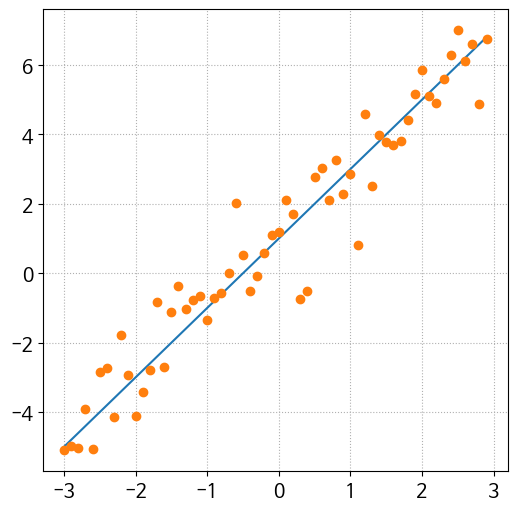

In [41]:
x = torch.arange(-3, 3, 0.1)
y = 2 * x + 1
y1 = 2 * x + 1 + torch.randn(x.shape)
print("x = \n", x)
print("y = \n", y1)

plt.plot(x.numpy(), y.numpy())
plt.plot(x.numpy(), y1.numpy(), "o")
plt.show()

### 회귀 분석: batch data

x = 
 tensor([-3.0000e+00, -2.9000e+00, -2.8000e+00, -2.7000e+00, -2.6000e+00,
        -2.5000e+00, -2.4000e+00, -2.3000e+00, -2.2000e+00, -2.1000e+00,
        -2.0000e+00, -1.9000e+00, -1.8000e+00, -1.7000e+00, -1.6000e+00,
        -1.5000e+00, -1.4000e+00, -1.3000e+00, -1.2000e+00, -1.1000e+00,
        -1.0000e+00, -9.0000e-01, -8.0000e-01, -7.0000e-01, -6.0000e-01,
        -5.0000e-01, -4.0000e-01, -3.0000e-01, -2.0000e-01, -1.0000e-01,
        -2.3842e-08,  1.0000e-01,  2.0000e-01,  3.0000e-01,  4.0000e-01,
         5.0000e-01,  6.0000e-01,  7.0000e-01,  8.0000e-01,  9.0000e-01,
         1.0000e+00,  1.1000e+00,  1.2000e+00,  1.3000e+00,  1.4000e+00,
         1.5000e+00,  1.6000e+00,  1.7000e+00,  1.8000e+00,  1.9000e+00,
         2.0000e+00,  2.1000e+00,  2.2000e+00,  2.3000e+00,  2.4000e+00,
         2.5000e+00,  2.6000e+00,  2.7000e+00,  2.8000e+00,  2.9000e+00])
y = 
 tensor([-4.9260, -5.4775, -3.8296, -4.4941, -5.0520, -2.7383, -4.7818, -2.7915,
        -2.7843, -2.4026, -2.17

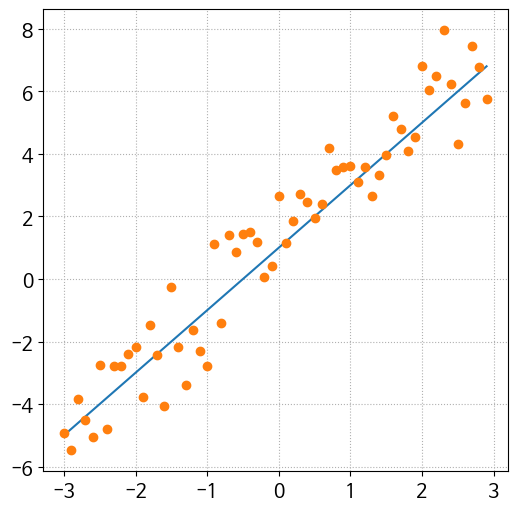

In [42]:
## Simulate data
x = torch.arange(-3, 3, 0.1)
y = 2 * x + 1
y1 = 2 * x + 1 + torch.randn(x.shape)
print("x = \n", x)
print("y = \n", y1)

plt.plot(x, y)
plt.plot(x, y1, "o")
plt.show()

In [43]:
# Initial weight and bias
a = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)
print("Initial value = \n", "="*50)
print("a: ", a)
print("b: ", b)

# Define loss and optimizer
lr = 0.01
loss = nn.MSELoss()
optimizer = optim.SGD([a, b], lr=lr)

n_epochs = 100

for epoch in range(n_epochs):
    yhat = a*x + b
    loss_result = loss(yhat, y1)
    if epoch % 10 == 0:
      print("epoch: ", epoch, "a: ", a.item(), "b: ",
            b.item(), "loss: ", loss_result.item())
    optimizer.zero_grad()
    loss_result.backward()
    optimizer.step()

print("After SGD", "="*50)
print(a, b)

Initial value = 
a:  tensor([0.1258], requires_grad=True)
b:  tensor([0.9218], requires_grad=True)
epoch:  0 a:  0.12583719193935394 b:  0.9218323826789856 loss:  12.212079048156738
epoch:  10 a:  1.012865662574768 b:  0.9706816077232361 loss:  4.31672477722168
epoch:  20 a:  1.4908305406570435 b:  1.016770839691162 loss:  2.0101499557495117
epoch:  30 a:  1.74851393699646 b:  1.0577574968338013 loss:  1.3291881084442139
epoch:  40 a:  1.8875501155853271 b:  1.0930416584014893 loss:  1.1234395503997803
epoch:  50 a:  1.9626601934432983 b:  1.122840404510498 loss:  1.0581856966018677
epoch:  60 a:  2.0033111572265625 b:  1.147711992263794 loss:  1.03551185131073
epoch:  70 a:  2.0253729820251465 b:  1.1683175563812256 loss:  1.0264265537261963
epoch:  80 a:  2.03739595413208 b:  1.1853080987930298 loss:  1.022113561630249
epoch:  90 a:  2.043987989425659 b:  1.1992748975753784 loss:  1.0197412967681885
After SGD ==================================================
tensor([2.0476], require

## 예측 함수의 내부 구조

In [44]:
# 레이어 함수 정의

# 첫번째 선형 함수
# 784 입력 수
# 128 출력 수
l1 = nn.Linear(784, 128)

# 두번째 선형 함수
# 128 입력 수
# 10 출력 수
l2 = nn.Linear(128, 10)

# 활성화 함수
relu = nn.ReLU(inplace=True)

In [62]:
# 입력 텐서로부터 출력 텐서를 계산

# 더미 입력 데이터 작성
inputs = torch.randn(100, 784)

# 중간 텐서 1 계산
m1 = l1(inputs)

# 중간 텐서 2 계산
m2 = relu(m1)

# 출력 텐서 계산
outputs = l2(m2)

# 입력 텐서와 출력 텐서 shape 확인
print('입력 텐서', inputs.shape)
print('출력 텐서', outputs.shape)

입력 텐서 torch.Size([100, 784])
출력 텐서 torch.Size([100, 10])


In [63]:
# nn.Sequential을 사용해 전체를 합성 함수로 정의

net2 = nn.Sequential(
    l1,
    relu,
    l2
)

outputs2 = net2(inputs)

# 입력 텐서와 출력 텐서의 shape 확인
print('입력 텐서', inputs.shape)
print('출력 텐서', outputs2.shape)

입력 텐서 torch.Size([100, 784])
출력 텐서 torch.Size([100, 10])


###  활성화 함수의 목적
이 절에서는 예측 결과 그래프(그림 4-9에서 그림 4-11까지)가 중요하며, 따라서 지금 시점에서 구현 코드의 의미를 이해하지 못하더라도 상관없다. 아래의 코드는 어디까지나 참고를 위해 작성되었다.

In [67]:
# 훈련 데이터, 검증 데이터 계산
np.random.seed(123)
x = np.random.randn(100,1)

# y는 x^2에 난수를 1/10만큼 더한 값
y = x**2 + np.random.randn(100,1) * 0.2

# 데이터를 50건씩 훈련용과 검증용으로 나눔
x_train = x[:50,:]
x_test = x[50:,:]
y_train = y[:50,:]
y_test = y[50:,:]

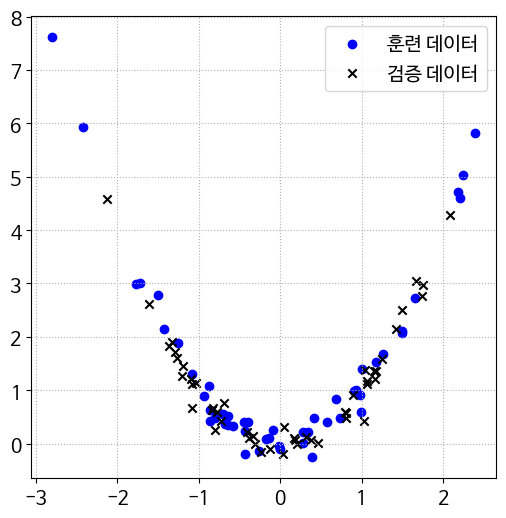

In [68]:
# 산포도 출력
plt.scatter(x_train, y_train, c='b', label='훈련 데이터')
plt.scatter(x_test, y_test, c='k', marker='x', label='검증 데이터')
plt.legend()
plt.show()

In [69]:
# 입력 변수 x와 정답 yt의 텐서화

inputs = torch.tensor(x_train).float()
labels = torch.tensor(y_train).float()

inputs_test = torch.tensor(x_test).float()
labels_test = torch.tensor(y_test).float()

### 선형 회귀 모델의 경우

In [70]:
# 모델 정의

class Net(nn.Module):
    def __init__(self):
        #  부모 클래스 nn.Modules 의 초기화
        super().__init__()

        # 출력층 정의
        self.l1 = nn.Linear(1, 1)   
        
    # 예측 함수 정의
    def forward(self, x):
        x1 = self.l1(x) # 선형 회귀
        return x1

In [27]:
# 학습률
lr = 0.01

# 인스턴스 생성(파라미터 초기화)
net = Net()

# 최적화 알고리즘 : 경사 하강법
optimizer = optim.SGD(net.parameters(), lr=lr)

# 손실 함수： 평균 제곱 오차
criterion = nn.MSELoss()

# 반복 횟수
num_epochs = 10000

#  history 기록을 위한 배열 초기화(손실 함수 값 만을 기록)
history = np.zeros((0,2))

In [71]:
# 반복 계산 메인 루프

for epoch in range(num_epochs):
    
    # 경사 값 초기화
    optimizer.zero_grad()

    # 예측 계산
    outputs = net(inputs)
  
    # 오차 계산
    loss = criterion(outputs, labels)

    # 경사 계산
    loss.backward()

    # 경사 하강법 적용
    optimizer.step()

    # 100회 마다 도중 경과를 기록
    if ( epoch % 100 == 0):
        history = np.vstack((history, np.array([epoch, loss.item()])))
        print(f'Epoch {epoch} loss: {loss.item():.5f}')

Epoch 0 loss: 3.19648
Epoch 100 loss: 3.19648
Epoch 200 loss: 3.19648
Epoch 300 loss: 3.19648
Epoch 400 loss: 3.19648
Epoch 500 loss: 3.19648
Epoch 600 loss: 3.19648
Epoch 700 loss: 3.19648
Epoch 800 loss: 3.19648
Epoch 900 loss: 3.19648
Epoch 1000 loss: 3.19648
Epoch 1100 loss: 3.19648
Epoch 1200 loss: 3.19648
Epoch 1300 loss: 3.19648
Epoch 1400 loss: 3.19648
Epoch 1500 loss: 3.19648
Epoch 1600 loss: 3.19648
Epoch 1700 loss: 3.19648
Epoch 1800 loss: 3.19648
Epoch 1900 loss: 3.19648
Epoch 2000 loss: 3.19648
Epoch 2100 loss: 3.19648
Epoch 2200 loss: 3.19648
Epoch 2300 loss: 3.19648
Epoch 2400 loss: 3.19648
Epoch 2500 loss: 3.19648
Epoch 2600 loss: 3.19648
Epoch 2700 loss: 3.19648
Epoch 2800 loss: 3.19648
Epoch 2900 loss: 3.19648
Epoch 3000 loss: 3.19648
Epoch 3100 loss: 3.19648
Epoch 3200 loss: 3.19648
Epoch 3300 loss: 3.19648
Epoch 3400 loss: 3.19648
Epoch 3500 loss: 3.19648
Epoch 3600 loss: 3.19648
Epoch 3700 loss: 3.19648
Epoch 3800 loss: 3.19648
Epoch 3900 loss: 3.19648
Epoch 4000 l

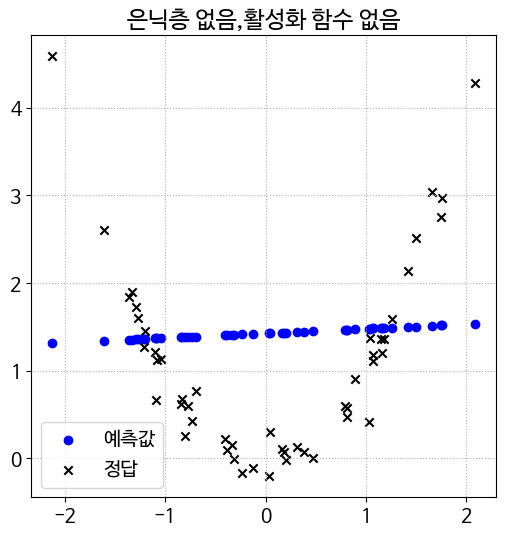

In [72]:
# 결과 그래프
labels_pred = net(inputs_test)

plt.title('은닉층 없음,활성화 함수 없음')
plt.scatter(inputs_test[:,0].data, labels_pred[:,0].data, c='b', label='예측값')
plt.scatter(inputs_test[:,0].data, labels_test[:,0].data, c='k', marker='x',label='정답')
plt.legend()
plt.show()

### 활성화 함수가 없는 딥러닝 모델의 경우

In [73]:
# 모델 정의

class Net2(nn.Module):
    def __init__(self):
        #  부모 클래스 nn.Modules 초기화
        super().__init__()

        # 출력층 정의
        self.l1 = nn.Linear(1, 10)
        self.l2 = nn.Linear(10, 10)
        self.l3 = nn.Linear(10,1)
        
    # 예측 함수 정의
    def forward(self, x):
        x1 = self.l1(x)
        x2 = self.l2(x1)
        x3 = self.l3(x2)
        return x3

In [74]:
# 학습률
lr = 0.01

# 인스턴스 생성(파라미터 초기화)
net2 = Net2()

# 최적화 알고리즘 : 경사 하강법
optimizer = optim.SGD(net2.parameters(), lr=lr)

# 손실 함수 : 평균 제곱 오차
criterion = nn.MSELoss()

# 반복 횟수
num_epochs = 10000

# history 기록을 위한 배열 초기화(손실 함수 값 만을 기록)
history = np.zeros((0,2))

In [75]:
# 반복 계산 메인 루프

for epoch in range(num_epochs):
    
    # 경사 값 초기화
    optimizer.zero_grad()

    # 예측 계산
    outputs = net2(inputs)
  
    # 오차 계산
    loss = criterion(outputs, labels)

    # 경사 계산
    loss.backward()

    # 경사 하강법 적용
    optimizer.step()

    # 100회 마다 도중 경과를 기록
    if ( epoch % 100 == 0):
        history = np.vstack((history, np.array([epoch, loss.item()])))
        print(f'Epoch {epoch} loss: {loss.item():.5f}')

Epoch 0 loss: 6.32316
Epoch 100 loss: 3.19668
Epoch 200 loss: 3.19631
Epoch 300 loss: 3.19631
Epoch 400 loss: 3.19631
Epoch 500 loss: 3.19631
Epoch 600 loss: 3.19631
Epoch 700 loss: 3.19631
Epoch 800 loss: 3.19631
Epoch 900 loss: 3.19631
Epoch 1000 loss: 3.19631
Epoch 1100 loss: 3.19631
Epoch 1200 loss: 3.19631
Epoch 1300 loss: 3.19631
Epoch 1400 loss: 3.19631
Epoch 1500 loss: 3.19631
Epoch 1600 loss: 3.19631
Epoch 1700 loss: 3.19631
Epoch 1800 loss: 3.19631
Epoch 1900 loss: 3.19631
Epoch 2000 loss: 3.19631
Epoch 2100 loss: 3.19631
Epoch 2200 loss: 3.19631
Epoch 2300 loss: 3.19631
Epoch 2400 loss: 3.19631
Epoch 2500 loss: 3.19631
Epoch 2600 loss: 3.19631
Epoch 2700 loss: 3.19631
Epoch 2800 loss: 3.19631
Epoch 2900 loss: 3.19631
Epoch 3000 loss: 3.19631
Epoch 3100 loss: 3.19631
Epoch 3200 loss: 3.19631
Epoch 3300 loss: 3.19631
Epoch 3400 loss: 3.19631
Epoch 3500 loss: 3.19631
Epoch 3600 loss: 3.19631
Epoch 3700 loss: 3.19631
Epoch 3800 loss: 3.19631
Epoch 3900 loss: 3.19631
Epoch 4000 l

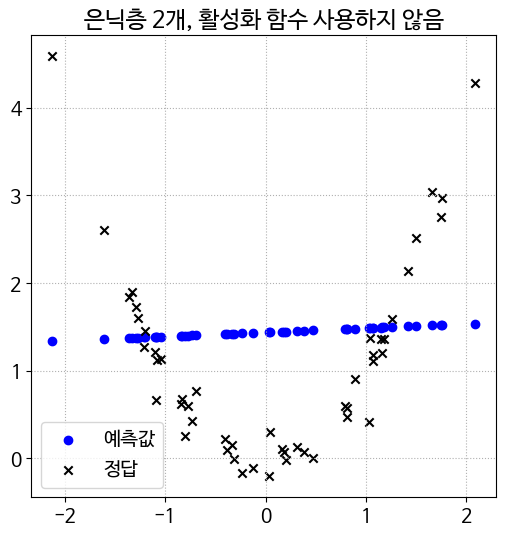

In [76]:
# 결과 그래프
labels_pred2 = net2(inputs_test)

plt.title('은닉층 2개, 활성화 함수 사용하지 않음')
plt.scatter(inputs_test[:,0].data, labels_pred2[:,0].data, c='b', label='예측값')
plt.scatter(inputs_test[:,0].data, labels_test[:,0].data, c='k', marker='x',label='정답')
plt.legend()
plt.show()

### 활성화 함수 사용가 있는 딥러닝 모델의 경우

In [77]:
# 모델 정의

class Net3(nn.Module):
    def __init__(self):
        #  부모 클래스 nn.Modules 초기화
        super().__init__()

        # 출력층 정의
        self.l1 = nn.Linear(1, 10)
        self.l2 = nn.Linear(10, 10)
        self.l3 = nn.Linear(10,1)
        self.relu = nn.ReLU(inplace=True)
        
    # 예측 함수 정의
    def forward(self, x):
        x1 = self.relu(self.l1(x))
        x2 = self.relu(self.l2(x1))
        x3 = self.l3(x2)
        return x3

In [78]:
# 학습률
lr = 0.01

# 인스턴스 생성(파라미터 초기화)
net3 = Net3()

# 최적화 알고리즘 : 경사 하강법
optimizer = optim.SGD(net3.parameters(), lr=lr)

# 손실 함수： 평균 제곱 오차
criterion = nn.MSELoss()

# 반복 횟수
num_epochs = 10000

# history 기록을 위한 배열 초기화(손실 함수 값 만을 기록)
history = np.zeros((0,2))

In [79]:
# 반복 계산 메인 루프

for epoch in range(num_epochs):
    
    # 경사 값 초기화
    optimizer.zero_grad()

    # 예측 계산
    outputs = net3(inputs)
  
    # 오차 계산
    loss = criterion(outputs, labels)

    # 경사 계산
    loss.backward()

    # 경사 하강법 적용
    optimizer.step()

    # 100회 마다 도중 경과를 기록
    if ( epoch % 100 == 0):
        history = np.vstack((history, np.array([epoch, loss.item()])))
        print(f'Epoch {epoch} loss: {loss.item():.5f}')

Epoch 0 loss: 5.50433
Epoch 100 loss: 0.46631
Epoch 200 loss: 0.09637
Epoch 300 loss: 0.08048
Epoch 400 loss: 0.07572
Epoch 500 loss: 0.07261
Epoch 600 loss: 0.07060
Epoch 700 loss: 0.06864
Epoch 800 loss: 0.06718
Epoch 900 loss: 0.06606
Epoch 1000 loss: 0.06513
Epoch 1100 loss: 0.06436
Epoch 1200 loss: 0.06364
Epoch 1300 loss: 0.06295
Epoch 1400 loss: 0.06228
Epoch 1500 loss: 0.06170
Epoch 1600 loss: 0.06120
Epoch 1700 loss: 0.06074
Epoch 1800 loss: 0.06030
Epoch 1900 loss: 0.05989
Epoch 2000 loss: 0.05950
Epoch 2100 loss: 0.05913
Epoch 2200 loss: 0.05874
Epoch 2300 loss: 0.05836
Epoch 2400 loss: 0.05800
Epoch 2500 loss: 0.05771
Epoch 2600 loss: 0.05737
Epoch 2700 loss: 0.05560
Epoch 2800 loss: 0.05393
Epoch 2900 loss: 0.05330
Epoch 3000 loss: 0.05149
Epoch 3100 loss: 0.04938
Epoch 3200 loss: 0.04824
Epoch 3300 loss: 0.04760
Epoch 3400 loss: 0.04721
Epoch 3500 loss: 0.04688
Epoch 3600 loss: 0.04586
Epoch 3700 loss: 0.04530
Epoch 3800 loss: 0.04494
Epoch 3900 loss: 0.04418
Epoch 4000 l

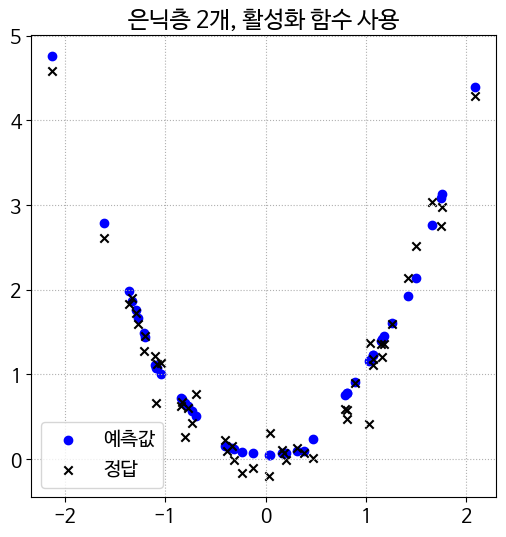

In [80]:
# 결과 그래프
labels_pred3 = net3(inputs_test)

plt.title('은닉층 2개, 활성화 함수 사용')
plt.scatter(inputs_test[:,0].data, labels_pred3[:,0].data, c='b', label='예측값')
plt.scatter(inputs_test[:,0].data, labels_test[:,0].data, c='k', marker='x',label='정답')
plt.legend()
plt.show()


## 이진 분류 (Binary classification) 비용 함수

### 시그모이드 (Sigmoid) 함수

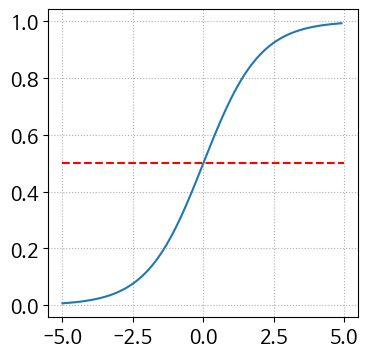

In [13]:
##
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

fig, axes = plt.subplots(figsize=(4, 4))
plt.plot(x, y)
plt.grid(linestyle = ":")
plt.hlines(0.5, -5, 5, colors="r", linestyles="dashed")
plt.show()

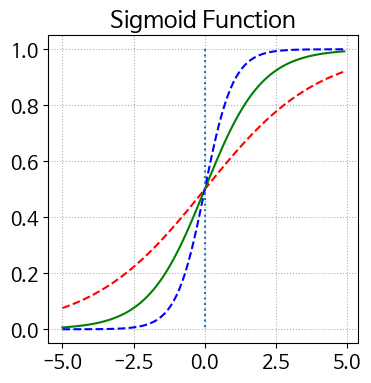

In [14]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

fig, axes = plt.subplots(figsize=(4, 4))
plt.plot(x, y1, 'r', linestyle='--') # W의 값이 0.5일때
plt.plot(x, y2, 'g') # W의 값이 1일때
plt.plot(x, y3, 'b', linestyle='--') # W의 값이 2일때
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

### 이진 분류 함수의 손실 함수와 비용 함수 

In [15]:
# torch.manual_seed(1)
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

print("Data shape", "="*50)
print(x_train.shape)
print(y_train.shape)

# Parameter initialize
W = torch.zeros((2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

print("W: \n", W)
print("b: \n", b)

# sigmoid function 
def prob(x, w, b):
    y = 1/(1 + torch.exp(-(torch.matmul(x, w) + b)))
    return y

prob = prob(x_train, W, b)
# prob = torch.sigmoid(x_train.matmul(W) + b)

print("Prob: \n", prob)

# cost function
losses = -(y_train*torch.log(prob) + (1 - y_train)*torch.log(1 - prob))
cost = losses.mean()
print("cost: \n", cost)

Data shape ==================================================
torch.Size([6, 2])
torch.Size([6, 1])
W: 
 tensor([[0.],
        [0.]], requires_grad=True)
b: 
 tensor([0.], requires_grad=True)
Prob: 
 tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<MulBackward0>)
cost: 
 tensor(0.6931, grad_fn=<MeanBackward0>)


In [16]:
# 
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

loss = nn.BCELoss()
sigmoid = nn.Sigmoid()
W = torch.zeros((2, 1), requires_grad=True) #
b = torch.zeros(1, requires_grad=True)

lr = 1
optimizer = optim.SGD([W, b], lr=1)
# print("optimizer: \n", optimizer)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    prediction = sigmoid(x_train.matmul(W) + b)
    # prediction = torch.sigmoid(x_train.matmul(W) + b) # method
    cost = loss(prediction, y_train)
    # cost = F.binary_cross_entropy(prediction, y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 0.693147
Epoch  100/1000 Cost: 0.134722
Epoch  200/1000 Cost: 0.080643
Epoch  300/1000 Cost: 0.057900
Epoch  400/1000 Cost: 0.045300
Epoch  500/1000 Cost: 0.037261
Epoch  600/1000 Cost: 0.031672
Epoch  700/1000 Cost: 0.027556
Epoch  800/1000 Cost: 0.024394
Epoch  900/1000 Cost: 0.021888
Epoch 1000/1000 Cost: 0.019852


## 다중 분류 (Multinomial classification) 비용 함수

### Pytorch 소프트맥스 함수

In [17]:
def softmax(x):
    y = np.exp(x)/np.sum(np.exp(x))
    return y


x = torch.rand(1, 4)
print('Tensor x = \n', x)

prob = softmax(x.numpy())
# prob = torch.softmax(x, dim = 1) # dim 0, 1
# prob = F.softmax(x, dim = 1)

print("Softmax = \n", prob)

Tensor x = 
 tensor([[0.8792, 0.5121, 0.3663, 0.2393]])
Softmax = 
 [[0.3548 0.2457 0.2124 0.1871]]


### Pytorch로 softmax 의 cost 함수 구현하기

In [18]:
### One-hot vector 만들기

x = torch.rand(3, 5, requires_grad=True)
print("x: \n", x)
prob = F.softmax(x, dim = 1)
print("prob: \n", prob)

y = torch.randint(5, (3,)) # torch.int64
print("target y = ", y)

# 모든 원소가 0의 값을 가진 3 × 5 텐서 생성
y_one_hot = torch.zeros_like(x)
print(y_one_hot)
y_one_hot.scatter_(dim = 1, index = y.unsqueeze(dim = 1), value = 1) # Tensor.scatter_(dim, index, src, *, reduce=None)
print("one hot vector = \n", y_one_hot)


# 비용함수
print("Crossentroy cost function = ")
(-y_one_hot * torch.log(F.softmax(x, dim=1))).sum(dim=1).mean()

x: 
 tensor([[0.5422, 0.3179, 0.9193, 0.9614, 0.8706],
        [0.2200, 0.7672, 0.9519, 0.2932, 0.7553],
        [0.8166, 0.6489, 0.2297, 0.9720, 0.9070]], requires_grad=True)


NameError: name 'F' is not defined

In [ ]:
### Crossentropy 비용함수
# Low level
torch.log(F.softmax(x, dim=1)) 

# High level
F.log_softmax(x, dim=1)

# cost function
(y_one_hot * - F.log_softmax(x, dim=1)).sum(dim=1).mean()

 # High level
# 세번째 수식
F.nll_loss(F.log_softmax(x, dim=1), y) # y =  tensor([1, 1, 3])

# 네번째 수식
F.cross_entropy(x, y) # z = torch.rand(3, 5, requires_grad=True), y = torch.randint(5, (3,))

In [ ]:
x_train = [[1, 2, 1, 1],
           [2, 1, 3, 2],
           [3, 1, 3, 4],
           [4, 1, 5, 5],
           [1, 7, 5, 5],
           [1, 2, 5, 6],
           [1, 6, 6, 6],
           [1, 7, 7, 7]]
y_train = [2, 2, 2, 1, 1, 1, 0, 0]
x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train)

print(x_train.shape)
print(y_train.shape)

#
y_one_hot = torch.zeros(8, 3)
y_one_hot.scatter_(1, y_train.unsqueeze(1), 1)


# 모델 초기화
W = torch.zeros((4, 3), requires_grad=True)
b = torch.zeros((1, 3), requires_grad=True)
# optimizer 설정
lr = 0.1
optimizer = optim.SGD([W, b], lr=lr)

nb_epochs = 100

for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = F.softmax(x_train.matmul(W) + b, dim=1)
    cost = (y_one_hot * -torch.log(hypothesis)).sum(dim=1).mean()

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

torch.Size([8, 4])
torch.Size([8])
Epoch    0/100 Cost: 1.098612
Epoch   10/100 Cost: 1.058486
Epoch   20/100 Cost: 0.935244
Epoch   30/100 Cost: 0.866157
Epoch   40/100 Cost: 0.821467
Epoch   50/100 Cost: 0.789573
Epoch   60/100 Cost: 0.765335
Epoch   70/100 Cost: 0.746007
Epoch   80/100 Cost: 0.729978
Epoch   90/100 Cost: 0.716254
Epoch  100/100 Cost: 0.704200
